# 3 layer LSTM Encoder Decoder, dropout. 30 day input, 1 day forecast

In [1]:
import numpy as np
import pandas as pd
import json
import os
import math
import datetime as dt
import matplotlib.pyplot as plt
from numpy import newaxis
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, LSTM, CuDNNLSTM, BatchNormalization, RepeatVector, TimeDistributed
from keras.models import Sequential, load_model
from sklearn.metrics import mean_squared_error

import utils
import model_funcs

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [16, 9]
%matplotlib inline

Using TensorFlow backend.


In [2]:
save_dir = 'models/lstm4_1'
df = pd.read_csv('data_25_normalized.csv', index_col='Date')
data = df.values

In [17]:
num_input = 30
num_out = 1
train_X, train_y, dev_X, dev_y, test_X, test_y, train_y_acc, dev_y_acc, test_y_acc = utils.prepare_data(data, num_input, num_preds=num_out)

train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
dev_y = dev_y.reshape((dev_y.shape[0], dev_y.shape[1], 1))
test_y = test_y.reshape((test_y.shape[0], test_y.shape[1], 1))
train_y_acc = train_y_acc.reshape((train_y.shape[0], train_y.shape[1], 1))
dev_y_acc = dev_y_acc.reshape((dev_y.shape[0], dev_y.shape[1], 1))
test_y_acc = test_y_acc.reshape((test_y.shape[0], test_y.shape[1], 1))

print("train_X shape", train_X.shape)
print("train_y shape", train_y.shape)
print("dev_X shape", dev_X.shape)
print("dev_y shape", dev_y.shape)
print("test_X shape", test_X.shape)
print("test_y shape", test_y.shape)
print("train_y_acc shape", train_y_acc.shape)
print("dev_y_acc shape", dev_y_acc.shape)
print("test_y_acc shape", test_y_acc.shape)


train_X shape (642, 30, 25)
train_y shape (642, 1, 1)
dev_X shape (80, 30, 25)
dev_y shape (80, 1, 1)
test_X shape (81, 30, 25)
test_y shape (81, 1, 1)
train_y_acc shape (642, 1, 1)
dev_y_acc shape (80, 1, 1)
test_y_acc shape (81, 1, 1)


In [5]:
if not os.path.exists(save_dir): os.makedirs(save_dir)

input_shape = train_X.shape[1:]
lr = 0.001
decay = 1e-6
dropout_rate = 0.3
epochs = 200
batch_size = 32

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=input_shape))
model.add(RepeatVector(num_out))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(100, activation='relu')))
model.add(TimeDistributed(Dense(1)))

opt = Adam(lr=lr, decay=decay)
model.compile(loss="mse", optimizer=opt)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               180800    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 100)            20100     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 1, 1)              101       
Total params: 521,801
Trainable params: 521,801
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model_funcs.train(
    model,
    train_X,
    train_y,
    (dev_X, dev_y),
    epochs = epochs,
    batch_size = batch_size,
    save_dir = save_dir
)

[Model] Training Started
[Model] 200 epochs, 32 batch size
Instructions for updating:
Use tf.cast instead.
Train on 642 samples, validate on 80 samples
Epoch 1/200
642/642 [==============================] - 3s 4ms/step - loss: 0.0556 - val_loss: 0.0029
Epoch 2/200
642/642 [==============================] - 1s 2ms/step - loss: 0.0171 - val_loss: 0.0016
Epoch 3/200
642/642 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 0.0011
Epoch 4/200
642/642 [==============================] - 1s 2ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/200
642/642 [==============================] - 1s 2ms/step - loss: 0.0020 - val_loss: 5.8624e-04
Epoch 6/200
642/642 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 7/200
642/642 [==============================] - 1s 2ms/step - loss: 0.0015 - val_loss: 5.2002e-04
Epoch 8/200
642/642 [==============================] - 1s 2ms/step - loss: 8.9941e-04 - val_loss: 4.4325e-04
Epoch 9/200
642/642 [===

Epoch 73/200
642/642 [==============================] - 1s 2ms/step - loss: 3.4835e-04 - val_loss: 0.0011
Epoch 74/200
642/642 [==============================] - 1s 2ms/step - loss: 3.2833e-04 - val_loss: 0.0012
Epoch 75/200
642/642 [==============================] - 1s 2ms/step - loss: 3.0293e-04 - val_loss: 7.4504e-04
Epoch 76/200
642/642 [==============================] - 1s 2ms/step - loss: 3.3495e-04 - val_loss: 9.3318e-04
Epoch 77/200
642/642 [==============================] - 1s 2ms/step - loss: 3.0448e-04 - val_loss: 0.0012
Epoch 78/200
642/642 [==============================] - 1s 2ms/step - loss: 2.9870e-04 - val_loss: 0.0012
Epoch 79/200
642/642 [==============================] - 1s 2ms/step - loss: 3.0619e-04 - val_loss: 9.9584e-04
Epoch 80/200
642/642 [==============================] - 1s 2ms/step - loss: 9.6513e-04 - val_loss: 6.9180e-04
Epoch 81/200
642/642 [==============================] - 1s 2ms/step - loss: 4.5552e-04 - val_loss: 7.3134e-04
Epoch 82/200
642/642 [====

642/642 [==============================] - 1s 2ms/step - loss: 2.1302e-04 - val_loss: 0.0013
Epoch 150/200
642/642 [==============================] - 1s 2ms/step - loss: 4.7036e-04 - val_loss: 0.0016
Epoch 151/200
642/642 [==============================] - 1s 2ms/step - loss: 2.3406e-04 - val_loss: 0.0016
Epoch 152/200
642/642 [==============================] - 1s 2ms/step - loss: 2.0303e-04 - val_loss: 0.0020
Epoch 153/200
642/642 [==============================] - 1s 2ms/step - loss: 1.9331e-04 - val_loss: 0.0020
Epoch 154/200
642/642 [==============================] - 1s 2ms/step - loss: 2.4928e-04 - val_loss: 0.0018
Epoch 155/200
642/642 [==============================] - 1s 2ms/step - loss: 2.7789e-04 - val_loss: 8.9799e-04
Epoch 156/200
642/642 [==============================] - 1s 2ms/step - loss: 4.3406e-04 - val_loss: 0.0010
Epoch 157/200
642/642 [==============================] - 1s 2ms/step - loss: 3.1908e-04 - val_loss: 0.0015
Epoch 158/200
642/642 [========================

(642, 1)
(642, 1)


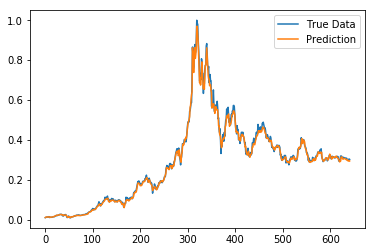

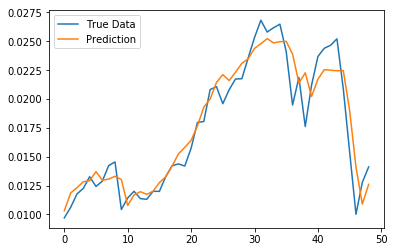

In [22]:
predicted_train = model.predict(train_X)
predicted_train = predicted_train.reshape(-1,1)
true_train = train_y.reshape(-1,1)
utils.plot_results(predicted_train.tolist(), true_train)
utils.plot_results(predicted_train.tolist()[:49], true_train[:49])

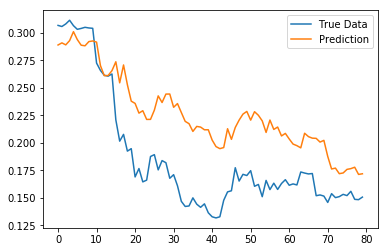

In [25]:
predicted_dev = model.predict(dev_X)
predicted_dev = predicted_dev.reshape(-1,1)
true_dev = dev_y.reshape(-1,1)
utils.plot_results(predicted_dev.tolist(), true_dev)

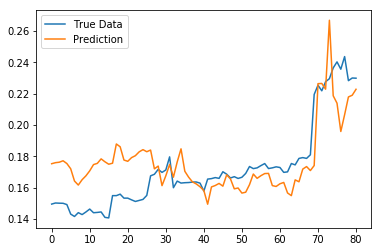

In [28]:
predicted_test = model.predict(test_X).squeeze()
predicted_test = predicted_test.reshape(-1,1)
true_test = test_y.reshape(-1,1)
utils.plot_results(predicted_test.tolist(), true_test)

In [29]:
print("MSE Train:", mean_squared_error(predicted_train.reshape(-1,1)[:len(true_train)], true_train))
print("MSE Dev:", mean_squared_error(predicted_dev.reshape(-1,1)[:len(true_dev)], true_dev))
print("MSE Test:", mean_squared_error(predicted_test.reshape(-1,1)[:len(true_test)], true_test))

MSE Train: 0.00018896793871967676
MSE Dev: 0.002351138120797436
MSE Test: 0.00038923514289763923


In [30]:
print("Acc Train:", utils.direction_accuracy(predicted_train.reshape(-1,1)[:len(true_train)], true_train))
print("Acc Dev:", utils.direction_accuracy(predicted_dev.reshape(-1,1)[:len(true_dev)], true_dev))
print("Acc Test:", utils.direction_accuracy(predicted_test.reshape(-1,1)[:len(true_test)], true_test))

Acc Train: 0.6177847113884556
Acc Dev: 0.4050632911392405
Acc Test: 0.4625


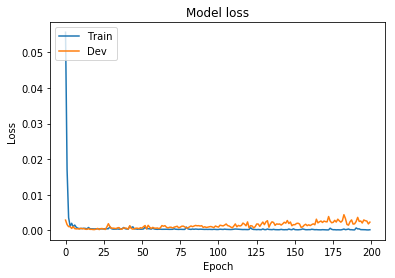

In [31]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Dev'], loc='upper left')
plt.show()